# **FILTRACIÓN DE TABLAS**
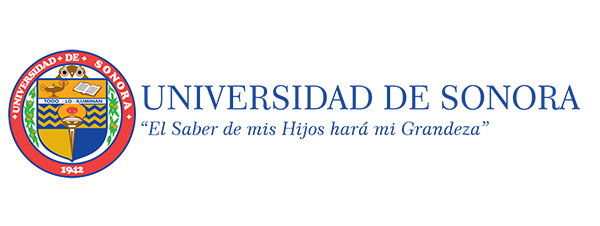 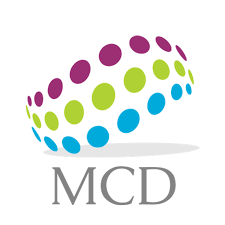

**Catherine Lee Scott Luévano**

Este análisis se centra en la producción pecuaria en México durante el periodo de 2013 a 2023. Utilizamos datos proporcionados por el Sistema de Información Agroalimentaria y Pesquera (SIAP) del Gobierno de México. El objetivo es examinar la producción de especies pecuarias específicas en ciertos municipios de interés.


Se recopilaron datos anuales en formato CSV desde el sitio web del SIAP, que incluye la producción de especies como bovinos, caprinos, porcinos, ovinos, aves y guajolotes. Los años abarcados en el análisis son del 2013 al 2023.

In [1]:
import requests
import pandas as pd


# Lista de URLs de los archivos Excel
urls = [
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2013.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2014.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2015.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2016.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2017.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2018.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2019.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2020.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2021.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2022.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2023.csv'
]

Para el análisis, nos centramos en:

**Municipios Específicos:** Los datos se filtraron para incluir solo los municipios de Huepac, Ures, Aconchi, Arizpe, Banámichi, Baviácora, Cananea y San Felipe de Jesús, que fue donde hubo afectaciones por la contaminación del Rio Sonora

**Especies Permitidas:** Se incluyeron únicamente las especies bovino, caprino, porcino y ovino. Descartando Aves y Guajolotes.

**Cambio de nombre** Se decidio cambiar el nombre a las columnas para un entendimiento mas claro.

In [2]:
valores_cmun = ['Huepac', 'Ures', 'Aconchi', 'Arizpe', 'Banámichi', 'Baviácora ', 'Cananea', 'San Felipe de Jesús']

In [3]:
especies_permitidas = ['Bovino', 'Caprino', 'Porcino', 'Ovino']


In [4]:
nuevos_nombres = {
    'Anio': 'Año',
    'Cveestado': 'Clave_Estado',
    'Nomestado': 'Nombre_Estado',
    'Nomddr': 'Nombre_DDR',
    'Cvempio': 'Clave_Municipio',
    'Nommunicipio': 'Nombre_Municipio',
    'Nomespecie': 'Nombre_Especie',
    'Cveproducto': 'Clave_Producto',
    'Nomproducto': 'Nombre_Producto',
    'Volumen': 'Volumen',
    'Precio': 'Precio',
    'Valor': 'Valor Total'
}

A continuación, se define una lista que almacenará los DataFrames filtrados de cada año. Luego, se implementa un bucle que recorrerá cada URL en la lista de datos, descargando y procesando los archivos CSV correspondientes a cada año. Durante este proceso, se extraerá el año del nombre del archivo y se realizará una solicitud HTTP para obtener los datos.

**Filtrar por Municipio:** Se filtran los datos para incluir únicamente aquellos registros que pertenecen a los municipios de interés definidos previamente.

**Filtrar por Especies:** Se restringe el conjunto de datos a las especies de ganado especificadas.

**Eliminar Columnas No Necesarias:** Se eliminan columnas que no aportan información relevante para el análisis.

**Almacenar DataFrame Filtrado:** El DataFrame resultante se agrega a una lista para su posterior combinación.

**Guardar Datos Filtrados:**  Finalmente, se guarda el DataFrame filtrado como un nuevo archivo CSV, facilitando su uso en análisis futuros.

In [5]:
# Lista para almacenar DataFrames filtrados
dataframes_filtrados = []

# Bucle para descargar y procesar cada archivo
for url in urls:
    # Extraer el año del nombre del archivo
    año = url.split('_')[-1].split('.')[0]
    nombre_archivo = f'ganaderia_{año}.csv'

    # Realizar la solicitud GET
    respuesta = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if respuesta.status_code == 200:
        # Guardar el contenido del archivo
        with open(nombre_archivo, 'wb') as archivo:
            archivo.write(respuesta.content)
        print(f'Archivo descargado y guardado como {nombre_archivo}')

        # Cargar el archivo CSV en un DataFrame usando 'ISO-8859-1'
        ganaderia = pd.read_csv(nombre_archivo, encoding='ISO-8859-1')

        # Filtrar la tabla donde CMUN está en la lista especificada
        ganaderia_filtrada = ganaderia[ganaderia['Nommunicipio'].isin(valores_cmun)]

        # Mantener solo las especies permitidas
        ganaderia_filtrada = ganaderia_filtrada[ganaderia_filtrada['Nomespecie'].isin(especies_permitidas)]

        # Eliminar las columnas especificadas
        ganaderia_filtrada = ganaderia_filtrada.drop(columns=['Cveddr', 'Cveespecie', 'Peso', 'Asacrificado', 'Nomddr'])

        # Agregar el DataFrame filtrado a la lista
        dataframes_filtrados.append(ganaderia_filtrada)

        # Mostrar la tabla filtrada
        print(f'Tabla filtrada para el año {año}:')
        print(ganaderia_filtrada)

        # Guardar el DataFrame filtrado como CSV
        ganaderia_filtrada.to_csv(f'tabla_filtrada_{año}.csv', index=False)
        print(f'Tabla filtrada guardada como tabla_filtrada_{año}.csv')
    else:
        print(f'Error al descargar el archivo: {respuesta.status_code}')

# Realizar el merge de todos los DataFrames filtrados por 'Nommunicipio'
    if dataframes_filtrados:
      ganaderia_merge = pd.concat(dataframes_filtrados, ignore_index=True)

    # Guardar el DataFrame combinado como CSV
    ganaderia_merge.to_csv('ganaderia_merge.csv', index=False)
    print('Merge de todas las tablas guardado como ganaderia_merge.csv')

Archivo descargado y guardado como ganaderia_2013.csv
Tabla filtrada para el año 2013:
       Anio  Cveestado Nomestado  Cvempio         Nommunicipio Nomespecie  \
26113  2013         26    Sonora       19              Cananea     Bovino   
26114  2013         26    Sonora       19              Cananea     Bovino   
26123  2013         26    Sonora        1              Aconchi     Bovino   
26124  2013         26    Sonora        1              Aconchi     Bovino   
26125  2013         26    Sonora        1              Aconchi     Bovino   
26126  2013         26    Sonora        1              Aconchi      Ovino   
26127  2013         26    Sonora        1              Aconchi      Ovino   
26128  2013         26    Sonora        1              Aconchi    Porcino   
26129  2013         26    Sonora        1              Aconchi    Porcino   
26131  2013         26    Sonora        6               Arizpe     Bovino   
26132  2013         26    Sonora        6               Arizpe    

Cambiaremos el nombre de las columnas y corregiremos los tipos de datos para un mejor manejo y comprobaremos que se realizó el cambio.

In [6]:
ganaderia_merge.rename(columns=nuevos_nombres, inplace=True)

In [7]:
ganaderia_merge

,Año,Clave_Estado,Nombre_Estado,Clave_Municipio,Nombre_Municipio,Nombre_Especie,Clave_Producto,Nombre_Producto,Volumen,Precio,Valor Total
0,2013.0,26.0,Sonora,19.0,Cananea,Bovino,1.0,Carne,908.695,35.21,31994.351
1,2013.0,26.0,Sonora,19.0,Cananea,Bovino,3.0,Ganado en pie,1774.055,17.3,30686.582
2,2013.0,26.0,Sonora,1.0,Aconchi,Bovino,1.0,Carne,376.91,59.49,22422.254
3,2013.0,26.0,Sonora,1.0,Aconchi,Bovino,3.0,Ganado en pie,726.015,29.06,21100.684
4,2013.0,26.0,Sonora,1.0,Aconchi,Bovino,6.0,Leche,384.452,5.13,1972.075
...,...,...,...,...,...,...,...,...,...,...,...
398,2023.0,26.0,Sonora,66.0,Ures,Caprino,3.0,Ganado en pie,26.523,38.6,1023.829
399,2023.0,26.0,Sonora,66.0,Ures,Ovino,1.0,Carne,32.907,81.09,2668.382
400,2023.0,26.0,Sonora,66.0,Ures,Ovino,3.0,Ganado en pie,65.796,39.35,2589.100
401,2023.0,26.0,Sonora,66.0,Ures,Porcino,1.0,Carne,2417.086,46.01,111211.207


Antes de realizar cualquier análisis en el DataFrame `ganaderia_merge`, es fundamental asegurarse de que los datos estén en el formato adecuado. Actualmente, las columnas `Volumen`, `Precio` y `Valor Total` están en formato de texto (`object`), lo que impide realizar cálculos y análisis numéricos.

Para abordar esto, llevaremos a cabo los siguientes pasos:

1. **Limpieza de Datos**: Vamos a eliminar las comas y los espacios en blanco de las cadenas de texto en las columnas mencionadas, asegurándonos de que solo contengan números.
2. **Conversión a Números**: Intentaremos convertir los valores limpios a tipo `float`, manejando cualquier error que pueda surgir durante este proceso.
3. **Ajuste de Tipos de Datos**: Finalmente, aseguraremos que las columnas que deberían ser enteras (`int`) se conviertan adecuadamente.

Esto nos permitirá trabajar con los datos de manera más efectiva y realizar análisis significativos en las variables relacionadas con la producción ganadera.

In [8]:
ganaderia_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               403 non-null    float64
 1   Clave_Estado      403 non-null    float64
 2   Nombre_Estado     403 non-null    object 
 3   Clave_Municipio   403 non-null    float64
 4   Nombre_Municipio  403 non-null    object 
 5   Nombre_Especie    403 non-null    object 
 6   Clave_Producto    403 non-null    float64
 7   Nombre_Producto   403 non-null    object 
 8   Volumen           403 non-null    object 
 9   Precio            403 non-null    object 
 10  Valor Total       403 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.8+ KB


In [9]:
# Reemplazar comas y espacios en blanco, pero mantener el formato
def clean_value(value):
    if isinstance(value, str):
        return value.replace(',', '').strip()  # Limpiar comas y espacios
    return value

# Aplicar la limpieza a las columnas
ganaderia_merge['Volumen'] = ganaderia_merge['Volumen'].apply(clean_value)
ganaderia_merge['Precio'] = ganaderia_merge['Precio'].apply(clean_value)
ganaderia_merge['Valor Total'] = ganaderia_merge['Valor Total'].apply(clean_value)

# Convertir a float, pero manejar los errores
def safe_float_conversion(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value  # Mantener el valor original si no se puede convertir

# Aplicar la conversión
ganaderia_merge['Volumen'] = ganaderia_merge['Volumen'].apply(safe_float_conversion)
ganaderia_merge['Precio'] = ganaderia_merge['Precio'].apply(safe_float_conversion)
ganaderia_merge['Valor Total'] = ganaderia_merge['Valor Total'].apply(safe_float_conversion)

# Cambiar tipos de datos a int
ganaderia_merge['Año'] = ganaderia_merge['Año'].astype(int)
ganaderia_merge['Clave_Estado'] = ganaderia_merge['Clave_Estado'].astype(int)
ganaderia_merge['Clave_Municipio'] = ganaderia_merge['Clave_Municipio'].astype(int)
ganaderia_merge['Clave_Producto'] = ganaderia_merge['Clave_Producto'].astype(int)

Después de limpiar y convertir los datos, es importante verificar la estructura del DataFrame `ganaderia_merge`. Esto incluye comprobar el número de entradas, los nombres de las columnas, los tipos de datos y la cantidad de valores no nulos en cada columna.

Esta verificación nos permitirá asegurarnos de que las transformaciones se han realizado correctamente y que los datos están listos para su análisis posterior.

In [10]:
ganaderia_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               403 non-null    int64  
 1   Clave_Estado      403 non-null    int64  
 2   Nombre_Estado     403 non-null    object 
 3   Clave_Municipio   403 non-null    int64  
 4   Nombre_Municipio  403 non-null    object 
 5   Nombre_Especie    403 non-null    object 
 6   Clave_Producto    403 non-null    int64  
 7   Nombre_Producto   403 non-null    object 
 8   Volumen           403 non-null    float64
 9   Precio            403 non-null    float64
 10  Valor Total       403 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 34.8+ KB


Para realizar un análisis detallado del conjunto de datos combinado, utilizaremos la biblioteca YData Profiling

In [13]:
!pip install -U ydata-profiling

Una vez que hemos cargado el DataFrame combinado, procederemos a generar un informe de perfil utilizando la biblioteca YData Profiling. Este informe nos proporcionará una visión integral de los datos, incluyendo:

**Estadísticas Descriptivas:** Resúmenes de las variables numéricas y categóricas.

**Distribuciones:** Visualizaciones que muestran cómo se distribuyen los datos en cada columna.

**Valores Faltantes:** Un análisis de la cantidad y proporción de datos faltantes en el conjunto.

**Correlaciones:** Una evaluación de las relaciones entre las variables.


In [14]:
from ydata_profiling import ProfileReport
ganaderia_profile = ProfileReport(ganaderia_merge, title="Reporte de ganaderia")

In [15]:
ganaderia_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Una vez generado el informe de perfil de datos, es útil guardarlo en un archivo HTML. Esto permite compartir el informe de manera sencilla y visualizarlo en cualquier navegador web, facilitando así la revisión y el análisis de los resultados.

In [16]:
ganaderia_profile.to_file("ganaderia_profilling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
!pip install autoviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [18]:
%matplotlib inline

from autoviz import AutoViz_Class
AV = AutoViz_Class()
dft = AV.AutoViz(ganaderia_merge, chart_format ='png')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (403, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Año,int64,0.000000,2,2013.000000,2023.000000,Possible date-time colum: transform before modeling step.
Clave_Estado,int64,0.000000,0,26.000000,26.000000,Possible Zero-variance or low information colum: drop before modeling step.
Nombre_Estado,object,0.000000,0,,,Possible Zero-variance or low information colum: drop before modeling step.
Clave_Municipio,int64,0.000000,1,1.000000,66.000000,No issue
Nombre_Municipio,object,0.000000,1,,,No issue
Nombre_Especie,object,0.000000,0,,,No issue
Clave_Producto,int64,0.000000,0,1.000000,6.000000,No issue
Nombre_Producto,object,0.000000,0,,,No issue
Volumen,float64,0.000000,NA,0.680000,7941.490000,Column has 28 outliers greater than upper bound (2673.34) or lower than lower bound(-1570.96). Cap them or remove them.
Precio,float64,0.000000,NA,5.090000,107.220000,No issue


Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
